In [1]:
# !pip install seaborn

In [1]:
!pip install keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# import xgboost as xgb
# from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import LSTM, Dense, Embedding, Bidirectional, Input, concatenate
from keras.layers import Input, Embedding

In [5]:
#import dataset# Open the zip file and read the CSVwith zipfile.ZipFile('dataset.zip', 'r') as z:with z.open('questions.csv') as f:data = pd.read_csv(f)

In [7]:
drop_column = ["qid1", "qid2", "id"]
data = data.drop(columns = drop_column)

In [9]:
questions1 = data['question1'].values.tolist()
questions2 = data['question2'].values.tolist()
labels = data['is_duplicate'].values

question1_str = data['question1'].astype(str)
question2_str = data['question2'].astype(str)
tokenizer = Tokenizer()
labels = data['is_duplicate'].values

tokenizer.fit_on_texts(question1_str + ' ' + question2_str)

seq1 = tokenizer.texts_to_sequences(question1_str)
seq2 = tokenizer.texts_to_sequences(question2_str)

max_length = max(max(map(len, seq1)), max(map(len, seq2)))
seq1 = pad_sequences(seq1, maxlen=max_length, padding='post')
seq2 = pad_sequences(seq2, maxlen=max_length, padding='post')

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

# input1 = Input(shape=(max_length,))
# input2 = Input(shape=(max_length,))

# embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)

# embedded_seq1 = embedding_layer(input1)
# embedded_seq2 = embedding_layer(input2)

input1 = Input(shape=(max_length,))
input2 = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)
embedded_seq1 = embedding_layer(input1)
embedded_seq2 = embedding_layer(input2)

lstm_layer = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

lstm_out1 = lstm_layer(embedded_seq1)
lstm_out2 = lstm_layer(embedded_seq2)

merged = concatenate([lstm_out1, lstm_out2])

output = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=[input1, input2], outputs=output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit([seq1, seq2], labels, epochs=5, batch_size=64, validation_split=0.3)

In [ ]:
from sklearn.metrics import confusion_matrix

all_predictions = model.predict([seq1, seq2])
binary_predictions = (all_predictions > 0.5).astype(int)
conf_matrix = confusion_matrix(labels, binary_predictions)

print("Confusion Matrix:")
print(conf_matrix)

  120/12636 ━━━━━━━━━━━━━━━━━━━━ 24:43 119ms/step

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [14]:
binary_predictions = (all_predictions > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, binary_predictions)

# Compute accuracy
accuracy = accuracy_score(labels, binary_predictions)

# Compute precision
precision = precision_score(labels, binary_predictions)

# Compute recall
recall = recall_score(labels, binary_predictions)

# Compute F1-score
f1 = f1_score(labels, binary_predictions)

print("Confusion Matrix:")
print(conf_matrix)
print()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Confusion Matrix:
[[229999  25046]
 [ 30421 118885]]

Accuracy: 0.8628246251400392
Precision: 0.8259860627661866
Recall: 0.7962506530213119
F1-score: 0.8108458345979531


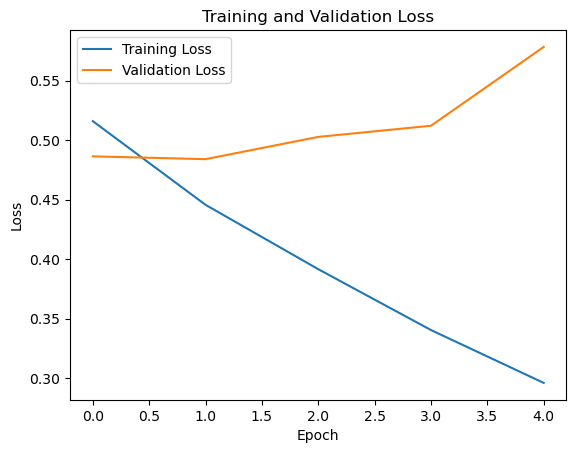

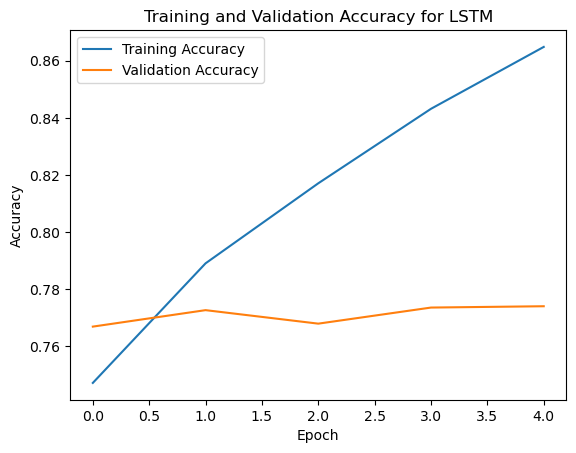

In [33]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
question1 = data.loc[5, 'question1']
question2 = data.loc[5, 'question2']
seq1 = tokenizer.texts_to_sequences([question1])
seq2 = tokenizer.texts_to_sequences([question2])
seq1 = pad_sequences(seq1, maxlen=max_length, padding='post')
seq2 = pad_sequences(seq2, maxlen=max_length, padding='post')
predictions = model.predict([seq1, seq2])
for question, prediction in zip([question1, question2], predictions):
    print("Question:", question)
    print("Duplicate Probability:", prediction[0])
    if prediction[0] > 0.5:
        print("Predicted: Duplicate")
    else:
        print("Predicted: Not Duplicate")
    print()

1/1 [==============================] - 0s 68ms/step
Question: Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
Duplicate Probability: 0.9039019
Predicted: Duplicate

